In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('/content/height-weight.csv')

In [3]:
df

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160
5,78,162
6,80,163
7,90,175
8,95,182
9,78,170


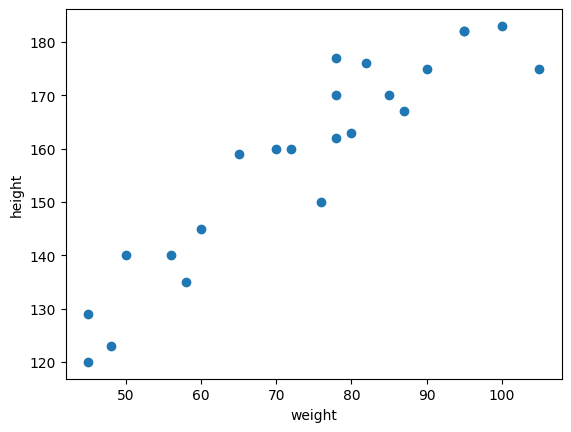

In [4]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("weight")
plt.ylabel("height")

plt.show()

In [5]:
## data division
x = df[['Weight']]
y = df['Height']

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [8]:
x.shape

(23, 1)

In [9]:
x_train.shape,x_test.shape

((18, 1), (5, 1))

In [10]:
y_train.shape,y_test.shape

((18,), (5,))

In [11]:
## standardizing the dataset
from sklearn.preprocessing import StandardScaler


In [12]:
scaler = StandardScaler()

In [13]:
scaler.fit_transform(x_train)   # required 2d array

array([[ 1.73689094],
       [-0.92026952],
       [ 1.4542143 ],
       [ 0.21043706],
       [-1.48562281],
       [ 1.17153765],
       [-1.6552288 ],
       [-0.80719886],
       [-0.24184557],
       [ 0.0973664 ],
       [-1.37255215],
       [-1.03334018],
       [-0.12877492],
       [ 0.88886101],
       [ 0.43657837],
       [ 0.60618436],
       [ 0.71925502],
       [ 0.32350772]])

In [14]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [15]:
x_train

array([[ 1.73689094],
       [-0.92026952],
       [ 1.4542143 ],
       [ 0.21043706],
       [-1.48562281],
       [ 1.17153765],
       [-1.6552288 ],
       [-0.80719886],
       [-0.24184557],
       [ 0.0973664 ],
       [-1.37255215],
       [-1.03334018],
       [-0.12877492],
       [ 0.88886101],
       [ 0.43657837],
       [ 0.60618436],
       [ 0.71925502],
       [ 0.32350772]])

In [16]:
x_train,x_test,y_train,y_test

(array([[ 1.73689094],
        [-0.92026952],
        [ 1.4542143 ],
        [ 0.21043706],
        [-1.48562281],
        [ 1.17153765],
        [-1.6552288 ],
        [-0.80719886],
        [-0.24184557],
        [ 0.0973664 ],
        [-1.37255215],
        [-1.03334018],
        [-0.12877492],
        [ 0.88886101],
        [ 0.43657837],
        [ 0.60618436],
        [ 0.71925502],
        [ 0.32350772]]),
 array([[ 0.34927086],
        [ 0.34927086],
        [-1.63795991],
        [ 1.37299581],
        [-0.43357762]]),
 12    175
 1     135
 13    183
 5     162
 2     123
 11    182
 20    129
 3     145
 4     160
 18    150
 16    140
 21    140
 22    160
 7     175
 10    176
 14    170
 19    167
 6     163
 Name: Height, dtype: int64,
 15    177
 9     170
 0     120
 8     182
 17    159
 Name: Height, dtype: int64)

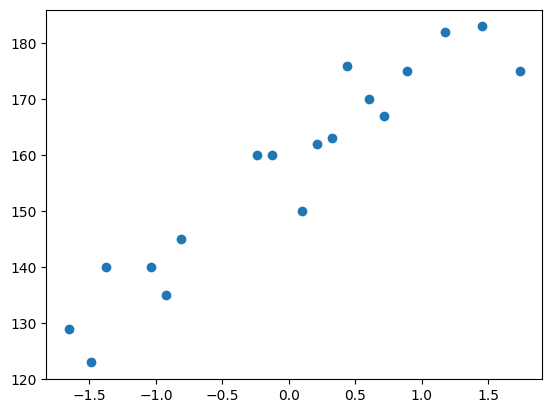

In [17]:
plt.scatter(x_train,y_train)
plt.show()

In [18]:
from sklearn.linear_model import LinearRegression


In [19]:
regressor = LinearRegression()

In [20]:
regressor.fit(x_train,y_train)

LinearRegression()

In [21]:
regressor.coef_  ## slope

array([17.03440872])

In [22]:
print("slope or coefficent of weight",regressor.coef_)

slope or coefficent of weight [17.03440872]


In [23]:
regressor.intercept_

np.float64(157.5)

In [24]:
print("intercept o the weight",regressor.intercept_)

intercept o the weight 157.5


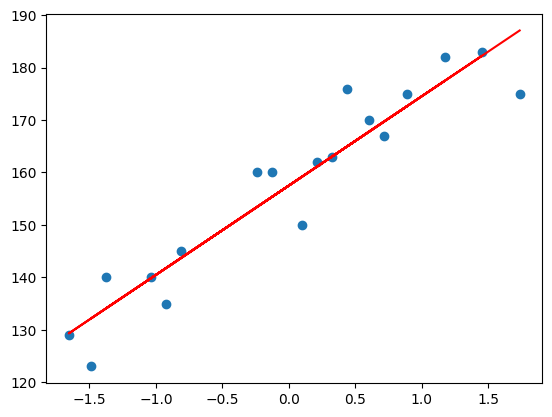

In [25]:
plt.scatter(x_train,y_train)
plt.plot(x_train,regressor.predict(x_train),color='red')
plt.show()

In [26]:
## check through test dataset
y_pred = regressor.predict(x_test)
y_test,y_pred

(15    177
 9     170
 0     120
 8     182
 17    159
 Name: Height, dtype: int64,
 array([163.44962265, 163.44962265, 129.59832137, 180.88817179,
        150.11426154]))

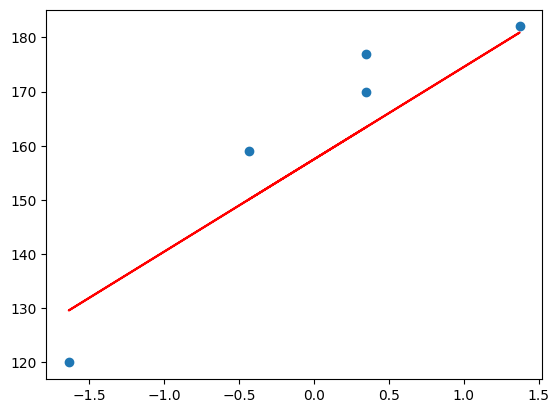

In [27]:
plt.scatter(x_test,y_test)
plt.plot(x_test,y_pred,color='red')
plt.show()

In [28]:
## performance matrix --
## mse,mae and rmse
## r2 and adjusted r2
## model accuracy

In [29]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [30]:
mse=mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse= np.sqrt(mse)

In [31]:
mse

79.76809057832979

In [32]:
mae

7.9393285483063725

In [33]:
rmse

np.float64(8.931298370244372)

In [34]:
## to check the accuracy
from sklearn.metrics import r2_score

In [35]:
score =r2_score(y_test,y_pred)

In [36]:
score

0.8379487839705635

In [37]:
## new datapoint check the output
scaled_data = scaler.transform([[80]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [38]:
scaled_data

array([[0.46970909]])

In [39]:
regressor.predict([scaled_data[0]])

array([165.50121667])

In [40]:
print("height prediction of the 80 kg is :",regressor.predict([scaled_data[0]]))

height prediction of the 80 kg is : [165.50121667]


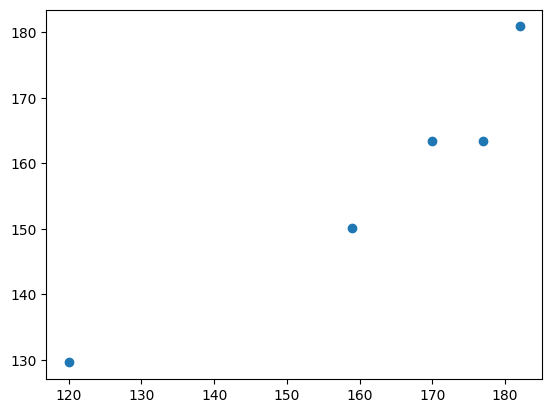

In [41]:
## assumption
## plot a scatter plot for the prediction
plt.scatter(y_test,y_pred)  ## if there is linear distribution than we can assume that we have done a very good prediction.

In [42]:
## assumtion -2
## residual -- y_test-y_pred
residual = y_test-y_pred

In [43]:
residual

,Height
15,13.550377
9,6.550377
0,-9.598321
8,1.111828
17,8.885738


/tmp/ipython-input-1589714379.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residual,kde=True) ## if there is normal distribution than we can say that we have created a better model.


<Axes: xlabel='Height', ylabel='Density'>

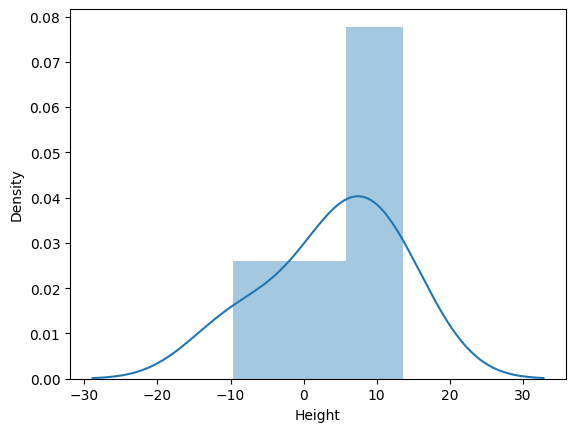

In [44]:
import seaborn as sns
sns.distplot(residual,kde=True) ## if there is normal distribution than we can say that we have created a better model.

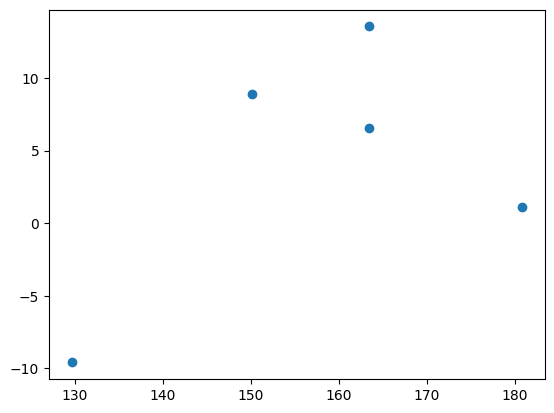

In [45]:
## assumption-3
plt.scatter(y_pred,residual) ## the data point are uniformly distributed than we can say that this is a good model

In [51]:
from sklearn.linear_model import Ridge

In [53]:
rg = Ridge()
rg.fit(x_train,y_train)

Ridge()

In [55]:
y_pred_rg = rg.predict(x_test)

In [56]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
mean_absolute_error(y_test,y_pred_rg)

8.526732308921828

In [57]:
mean_squared_error(y_test,y_pred_rg)

87.89351116460732

In [59]:
r2_score(y_test,y_pred_rg)

0.8214417536880234

In [60]:
from sklearn.linear_model import ElasticNet

In [62]:
en = ElasticNet()
en.fit(x_train,y_train)

ElasticNet()

In [64]:
y_pred_en = en.predict(x_test)

In [65]:
mean_squared_error(y_test,y_pred_en)

164.99828690332635

In [66]:
mean_absolute_error(y_test,y_pred_en)

11.877947020648843

In [68]:
r2_score(y_test,y_pred_en)

0.6648011398843524

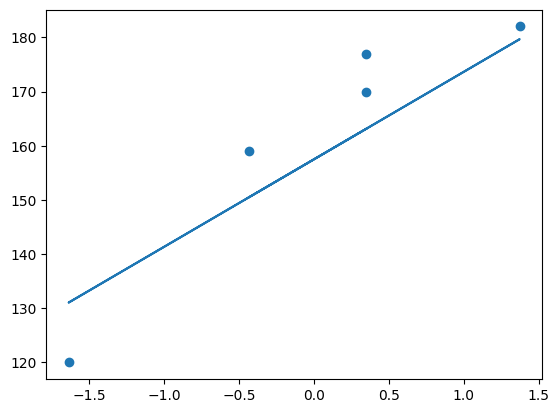

In [77]:
plt.scatter(x_test,y_test)
plt.plot(x_test,y_pred_rg)
plt.show()

In [71]:
from sklearn.linear_model import RidgeCV

In [72]:
rcv = RidgeCV(cv=5)

In [74]:
rcv.fit(x_train,y_train)
rcv_pred = rcv.predict(x_test)

In [75]:
r2_score(y_test,rcv_pred)

0.8363694216131539

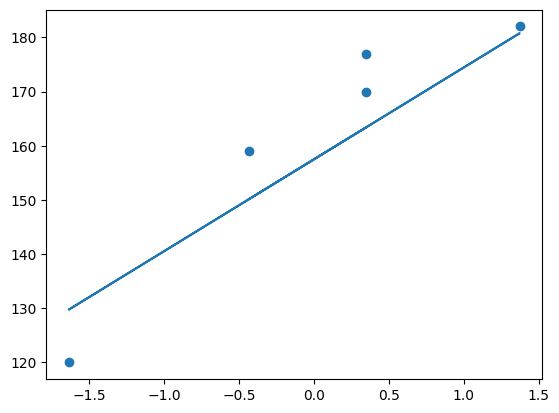

In [79]:
plt.scatter(x_test,y_test)
plt.plot(x_test,rcv_pred)

In [81]:
rcv.params()

AttributeError: 'RidgeCV' object has no attribute 'params'

In [83]:
rcv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': None,
 'store_cv_values': 'deprecated'}

In [84]:
scaler

StandardScaler()

In [87]:
rg

Ridge()

In [88]:
### pickle the ml models,preprocessing model standardscaler.
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(rg,open('ridge.pkl','wb'))